# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Who**: Healthcare professionals and researchers can use findings to better support early detection techniques and prevention strategies.

**What**: Identify key socioeconomic, demographic, and lifestyle factors most strongly associated with chronic disease onset.

**How**: Develop predictive machine learning models to understand early risk indicators of chronic diseases by analyzing 3 different datasets, each about a different disease.

# 3. Homework - work with your own data

In [135]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import matplotlib.pyplot as plt

### Dataset 1: Hypertension

In [136]:
hypertension_path = kagglehub.dataset_download("ankushpanday1/hypertension-risk-prediction-dataset")
print("Path to dataset files:", hypertension_path)

Path to dataset files: /Users/ishita/.cache/kagglehub/datasets/ankushpanday1/hypertension-risk-prediction-dataset/versions/1


In [137]:
dataset_path_to_file = os.path.join(hypertension_path, "hypertension_dataset.csv")
hypertension_raw_data = pd.read_csv(dataset_path_to_file)

In [138]:
hypertension_raw_data.describe()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000


In [139]:
hypertension_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [140]:
d_type = hypertension_raw_data.dtypes.value_counts()
d_type

int64      10
object      9
float64     4
Name: count, dtype: int64

In [141]:
hypertension_df = hypertension_raw_data.copy()

In [142]:
hypertension_df

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174977,India,51,39.4,266,174,82,Never,10.3,Low,Yes,...,9.5,96,172,72,100,95,Female,Tertiary,Employed,Low
174978,Australia,89,39.0,243,104,94,Never,7.2,Moderate,Yes,...,6.2,63,81,66,140,124,Female,Primary,Employed,High
174979,India,43,36.5,266,109,98,Former,22.9,Low,Yes,...,10.0,62,139,39,93,71,Male,Secondary,Employed,High
174980,Germany,48,18.3,294,134,84,Never,15.3,High,No,...,4.7,53,112,37,57,87,Male,Primary,Retired,High


In [143]:
mean = hypertension_df.mean(numeric_only=True)
median = hypertension_df.median(numeric_only=True)
mode = hypertension_df.mode(numeric_only=True).iloc[0]
print(mean)
print(median)
print(mode)

Age                53.493319
BMI                27.494672
Cholesterol       224.539335
Systolic_BP       134.505229
Diastolic_BP       89.450315
Alcohol_Intake     14.991069
Stress_Level        5.013041
Salt_Intake         8.482757
Sleep_Duration      6.996468
Heart_Rate         74.495085
LDL               129.528271
HDL                64.573105
Triglycerides     149.569836
Glucose           134.488187
dtype: float64
Age                54.0
BMI                27.5
Cholesterol       225.0
Systolic_BP       135.0
Diastolic_BP       89.0
Alcohol_Intake     15.0
Stress_Level        5.0
Salt_Intake         8.5
Sleep_Duration      7.0
Heart_Rate         74.0
LDL               130.0
HDL                65.0
Triglycerides     150.0
Glucose           134.0
dtype: float64
Age                73.0
BMI                22.5
Cholesterol       178.0
Systolic_BP       174.0
Diastolic_BP       85.0
Alcohol_Intake      6.7
Stress_Level        7.0
Salt_Intake         9.9
Sleep_Duration      6.5
Heart_Rate  

In [144]:
duplicated_hypertension = hypertension_df.duplicated().sum()
print(duplicated_hypertension)

0


In [145]:
missing = hypertension_df.isnull().sum()
missing

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

In [146]:
inconsistent_age = hypertension_df[hypertension_df['Age'] < 0]
inconsistent_age

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension


In [147]:
categorical_columns = hypertension_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Country', 'Smoking_Status', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Gender', 'Education_Level',
       'Employment_Status', 'Hypertension'],
      dtype='object')

In [ ]:
encoded = pd.get_dummies(hypertension_df, columns=['Country', 'Smoking_Status', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Gender', 'Education_Level',
       'Employment_Status'], drop_first=True)
encoded.head()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,...,Smoking_Status_Never,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Family_History_Yes,Diabetes_Yes,Gender_Male,Education_Level_Secondary,Education_Level_Tertiary,Employment_Status_Retired,Employment_Status_Unemployed
0,58,29.5,230,160,79,27.9,9,14.7,6.1,80,...,True,True,False,True,True,False,False,False,False,True
1,34,36.2,201,120,84,27.5,6,10.8,9.8,56,...,True,False,False,True,True,True,True,False,False,True
2,73,18.2,173,156,60,1.8,5,6.5,5.2,75,...,False,False,False,True,True,True,False,False,False,False
3,60,20.3,183,122,94,11.6,6,4.0,7.5,71,...,True,False,True,True,True,False,True,False,True,False
4,73,21.8,296,91,97,29.1,6,8.4,5.0,52,...,True,False,True,True,False,False,False,False,False,False


### Dataset 2: Diabetes

In [149]:
diabetes_path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
print("Path to dataset files:", diabetes_path)

Path to dataset files: /Users/ishita/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1


In [150]:
dataset_path_to_file = os.path.join(diabetes_path, "diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_raw_data = pd.read_csv(dataset_path_to_file)

In [151]:
diabetes_raw_data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [152]:
diabetes_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [153]:
d_type = diabetes_raw_data.dtypes.value_counts()
d_type

float64    22
Name: count, dtype: int64

In [154]:
diabetes_df = diabetes_raw_data.copy()

In [155]:
diabetes_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [156]:
mean = diabetes_df.mean(numeric_only=True)
median = diabetes_df.median(numeric_only=True)
mode = diabetes_df.mode(numeric_only=True).iloc[0]
print(mean)
print(median)
print(mode)

Diabetes_012             0.296921
HighBP                   0.429001
HighChol                 0.424121
CholCheck                0.962670
BMI                     28.382364
Smoker                   0.443169
Stroke                   0.040571
HeartDiseaseorAttack     0.094186
PhysActivity             0.756544
Fruits                   0.634256
Veggies                  0.811420
HvyAlcoholConsump        0.056197
AnyHealthcare            0.951053
NoDocbcCost              0.084177
GenHlth                  2.511392
MentHlth                 3.184772
PhysHlth                 4.242081
DiffWalk                 0.168224
Sex                      0.440342
Age                      8.032119
Education                5.050434
Income                   6.053875
dtype: float64
Diabetes_012             0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysA

In [157]:
duplicated_diabetes= diabetes_df.duplicated().sum()
print(duplicated_diabetes)

23899


In [158]:
diabetes_df = diabetes_df.drop_duplicates(keep='first')

duplicated_diabetes= diabetes_df.duplicated().sum()
print(duplicated_diabetes)

0


In [159]:
missing = diabetes_df.isnull().sum()
missing

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [160]:
inconsistent_age = diabetes_df[diabetes_df['Age'] < 0]
inconsistent_age

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [ ]:
inconsistent_bmi = diabetes_df[diabetes_df['BMI'] > 60]
inconsistent_bmi

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
11614,2.0,1.0,1.0,1.0,85.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,6.0,4.0,3.0
18415,0.0,1.0,0.0,1.0,82.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,9.0,3.0,5.0
19543,0.0,1.0,1.0,1.0,79.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,30.0,10.0,0.0,1.0,7.0,5.0,7.0
19816,2.0,1.0,1.0,1.0,92.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.0,30.0,30.0,0.0,1.0,4.0,6.0,1.0
25574,0.0,1.0,0.0,1.0,79.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,30.0,1.0,0.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229615,0.0,0.0,0.0,1.0,77.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,4.0,6.0
233982,0.0,0.0,0.0,1.0,88.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,4.0,14.0,2.0,1.0,0.0,3.0,6.0,3.0
242342,0.0,0.0,0.0,1.0,79.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,1.0
242716,0.0,1.0,0.0,1.0,76.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,15.0,15.0,1.0,0.0,5.0,4.0,2.0


In [180]:
diabetes_df = diabetes_df[diabetes_df['BMI'] <= 60]
diabetes_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### Dataset 3: Colorectal Cancer

In [162]:
cancer__path = kagglehub.dataset_download("ankushpanday2/colorectal-cancer-global-dataset-and-predictions")
print("Path to dataset files:", cancer__path)

Path to dataset files: /Users/ishita/.cache/kagglehub/datasets/ankushpanday2/colorectal-cancer-global-dataset-and-predictions/versions/1


In [163]:
dataset_path_to_file = os.path.join(cancer__path, "colorectal_cancer_dataset.csv")
cancer_raw_data = pd.read_csv(dataset_path_to_file)

In [164]:
cancer_raw_data.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [165]:
cancer_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [166]:
d_type = cancer_raw_data.dtypes.value_counts()
d_type

object    22
int64      6
Name: count, dtype: int64

In [167]:
cancer_df = cancer_raw_data.copy()

In [181]:
cancer_df

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,1,Localized,69,0,0,1,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,1
1,2,UK,59,1,Localized,33,0,0,0,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,1
2,3,Japan,66,1,Regional,17,0,1,0,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,0
3,4,USA,83,1,Regional,14,0,0,0,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,1
4,5,France,66,1,Localized,34,0,1,0,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167492,167493,USA,69,1,Localized,49,0,1,0,Overweight,...,No,Yes,100924,57,13,Rural,Developed,Moderate,Insured,1
167493,167494,USA,79,0,Regional,29,1,1,1,Overweight,...,Yes,Yes,90331,39,22,Urban,Developed,Low,Insured,1
167494,167495,USA,74,1,Metastatic,62,1,1,1,Normal,...,Yes,Yes,90631,13,19,Urban,Developing,Low,Insured,1
167495,167496,UK,68,0,Localized,35,0,1,1,Normal,...,Yes,No,114385,18,23,Urban,Developed,Moderate,Insured,1


In [169]:
mean = cancer_df.mean(numeric_only=True)
median = cancer_df.median(numeric_only=True)
mode = cancer_df.mode(numeric_only=True).iloc[0]
print(mean)
print(median)
print(mode)

Patient_ID                 83749.000000
Age                           69.200780
Tumor_Size_mm                 42.005708
Healthcare_Costs           72452.168099
Incidence_Rate_per_100K       34.531562
Mortality_Rate_per_100K       17.023875
dtype: float64
Patient_ID                 83749.0
Age                           69.0
Tumor_Size_mm                 42.0
Healthcare_Costs           72344.0
Incidence_Rate_per_100K       35.0
Mortality_Rate_per_100K       17.0
dtype: float64
Patient_ID                     1.0
Age                           74.0
Tumor_Size_mm                 22.0
Healthcare_Costs           53546.0
Incidence_Rate_per_100K       25.0
Mortality_Rate_per_100K       21.0
Name: 0, dtype: float64


In [170]:
duplicated_cancer = cancer_df.duplicated().sum()
print(duplicated_cancer)

0


In [171]:
missing = cancer_df.isnull().sum()
missing

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [172]:
inconsistent_age = cancer_df[cancer_df['Age'] < 0]
inconsistent_age

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction


In [173]:
categorical_columns = cancer_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Country', 'Gender', 'Cancer_Stage', 'Family_History',
       'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk',
       'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease',
       'Genetic_Mutation', 'Screening_History', 'Early_Detection',
       'Treatment_Type', 'Survival_5_years', 'Mortality', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [174]:
binary_cols = {
    'Gender': {'M': 1, 'F': 0},
    'Family_History': {'Yes': 1, 'No': 0},
    'Smoking_History': {'Yes': 1, 'No': 0},
    'Alcohol_Consumption': {'Yes': 1, 'No': 0},
    'Genetic_Mutation': {'Yes': 1, 'No': 0},
    'Early_Detection': {'Yes': 1, 'No': 0},
    'Survival_Prediction': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_cols.items():
    if col in cancer_df.columns:
        cancer_df[col] = cancer_df[col].map(mapping)

In [175]:
nominal_cols = ['Cancer_Stage', 'Treatment_Type']
existing_nominal_cols = [col for col in nominal_cols if col in cancer_df.columns]

encoded = pd.get_dummies(cancer_df, columns=existing_nominal_cols, drop_first=True)

encoded.head()


,Patient_ID,Country,Age,Gender,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction,Cancer_Stage_Metastatic,Cancer_Stage_Regional,Treatment_Type_Combination,Treatment_Type_Radiotherapy,Treatment_Type_Surgery
0,1,UK,77,1,69,0,0,1,Overweight,Low,...,Urban,Developed,Moderate,Insured,1,False,False,True,False,False
1,2,UK,59,1,33,0,0,0,Overweight,Moderate,...,Urban,Developing,High,Uninsured,1,False,False,False,False,False
2,3,Japan,66,1,17,0,1,0,Normal,Low,...,Urban,Developed,Moderate,Uninsured,0,False,True,False,False,False
3,4,USA,83,1,14,0,0,0,Obese,High,...,Urban,Developed,Moderate,Insured,1,False,True,False,False,True
4,5,France,66,1,34,0,1,0,Normal,Low,...,Urban,Developing,High,Insured,1,False,False,False,False,True


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

Yes, all the kaggle datasets are usable. There was some cleaning done, like taking care of duplicates and one-hot encoding. There were only minor data cleaning steps that had to be taken, and we're left with a lot of data and columns so it is good to proceed. I did not notice any class imbalance

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

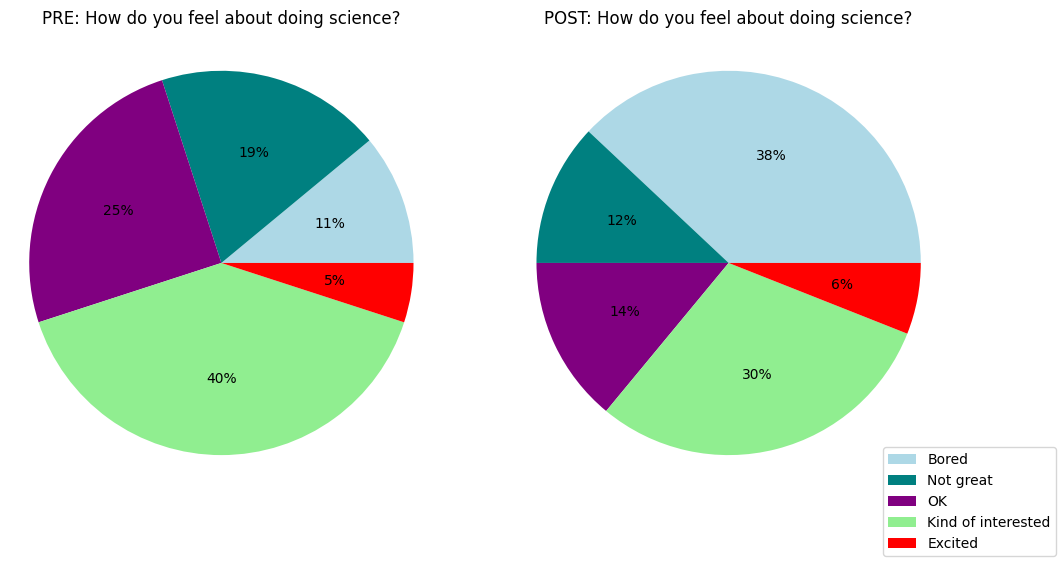

In [176]:
labels = ['Bored', 'Not great', 'OK', 'Kind of interested', 'Excited']
pre_sizes = [11, 19, 25, 40, 5]
colors = ['lightblue', 'teal', 'purple', 'lightgreen', 'red']
post_sizes = [38, 12, 14, 30, 6]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax1 = axes[0]
ax1.pie(pre_sizes, labels=None, colors=colors, autopct='%1.0f%%')
ax1.set_title('PRE: How do you feel about doing science?') 
ax1.axis('equal')

ax2 = axes[1]
ax2.pie(post_sizes, labels=None, colors=colors, autopct='%1.0f%%')
ax2.set_title('POST: How do you feel about doing science?') 
ax2.axis('equal')
fig.legend(labels, loc='lower right')
plt.show()
